In [79]:
# Ignore warnings 

import warnings
warnings.filterwarnings("ignore")

# Import packages

import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir("...")

# Read data into dataframe

df = pd.read_fwf("C:/Portfolio/Data Engineer Track/Python/Uzaki chan Text Analytics/Transcriptions/S1_S2_combined/S1_S2_combined.txt", sep = " ",  header = None)

# Print head

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Now there's a sight for sore eyes. Nothing say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,That's right. Hana Uzaki.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Hi, I'm your underclassman again. Wait, are yo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The college? Afraid not. I mean, they don't ev...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,But you worked so hard at it in high school.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


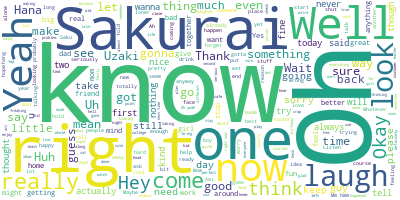

In [80]:
# Import the wordcloud library

from wordcloud import WordCloud

# Join the different processed words together.

long_string = ','.join(list(df[0].values))

# Creat a WordCloud object

wordcloud = WordCloud(background_color = "white", max_words = 30000, contour_width = 3, contour_color = "steelblue")

# Generate a WordCloud

wordcloud.generate(long_string)

# Visualize the word cloud

wordcloud.to_image()

# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df[0].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# Prepare data for LDA Analysis.

In [81]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words.extend(["oh", "uh", "well", "yeah", "hey", "see", "could", "yet", "would", "said", "much", "like", "thing", "things", "really", "huh", "right", "say", "sure", 
"got", "get", "know", "hmmm", "mm", "anything", "whatever", "let", "ah", "wanna", "though", "going", "nothing", "make", "already", "hmm", "gonna", "ready", "still", 
"tell", "one", "need", "gotta", "something", "might", "good", "great", "okay", "guess", "cool", "two", "go", "fine", "wow", "keep", "totally", "cuz", "happened",
"looks", "kind", "take", "back", "mean", "actually", "since", "even"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc = True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence),
deacc = True))

def remove_stopwords(texts): 
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = df[0].values.tolist()
data_words = list(sent_to_words(data))

# Remove stop words

data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['sight', 'sore', 'eyes', 'says', 'spring', 'quite', 'uzaki']


In [82]:
# Import gensim packages and create dictionary

import gensim.corpora as corpora

# Create Dictionary

id2word = corpora.Dictionary(data_words)

# Create Corpus

texts = data_words

# Term Document Frequency

corpus = [id2word.doc2bow(text) for text in texts]

# View 

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


# Establish the number of topics to create.

In [83]:

from pprint import pprint

# number of topics

num_topics = 10

# Build LDA model 

lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics = num_topics)

# Print the keyword in the 10 topics

pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

[(0,
  '0.024*"sakurai" + 0.007*"hana" + 0.007*"wait" + 0.007*"day" + 0.007*"uzaki" '
  '+ 0.006*"look" + 0.006*"sorry" + 0.006*"mom" + 0.005*"play" + 0.005*"come"'),
 (1,
  '0.018*"way" + 0.014*"laugh" + 0.013*"come" + 0.012*"think" + 0.010*"time" + '
  '0.009*"try" + 0.008*"hana" + 0.007*"help" + 0.006*"always" + '
  '0.006*"better"'),
 (2,
  '0.013*"sakurai" + 0.010*"nice" + 0.010*"thought" + 0.008*"little" + '
  '0.008*"today" + 0.007*"time" + 0.006*"please" + 0.006*"come" + 0.006*"home" '
  '+ 0.005*"anyway"'),
 (3,
  '0.009*"come" + 0.008*"look" + 0.006*"hana" + 0.006*"first" + 0.006*"time" + '
  '0.006*"think" + 0.006*"maybe" + 0.005*"big" + 0.005*"man" + '
  '0.005*"sakurai"'),
 (4,
  '0.009*"way" + 0.008*"sakurai" + 0.008*"wait" + 0.008*"time" + 0.007*"uzaki" '
  '+ 0.006*"hana" + 0.006*"look" + 0.006*"think" + 0.006*"getting" + '
  '0.005*"little"'),
 (5,
  '0.016*"time" + 0.016*"think" + 0.013*"uzaki" + 0.011*"sakurai" + '
  '0.009*"thanks" + 0.007*"come" + 0.006*"work" + 0.

# Visualize the topics.

In [84]:
import pyLDAvis.gensim
import pickle
import pyLDAvis

# Visualize the topics

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('c:/Portfolio/Data Engineer Track/Python/Uzaki chan Text Analytics/Transcriptions/S1_S2_combined/S1_S2_combined.txt'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
    

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'c:/Portfolio/Data Engineer Track/Python/Uzaki chan Text Analytics/Transcriptions/S1_S2_combined/S1_S2_combined.txt' +
str(num_topics) + ".html")

LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.002628 -0.012559       1        1  12.437880
6     -0.021308 -0.020761       2        1  11.052383
8     -0.034271  0.013250       3        1  10.869219
2      0.017392  0.010735       4        1  10.641056
3      0.055765  0.000388       5        1  10.451752
5      0.073824 -0.109230       6        1   9.835351
0     -0.001268  0.028380       7        1   9.206681
4      0.007613  0.096759       8        1   9.157515
9     -0.128962 -0.045264       9        1   8.619796
7      0.033842  0.038301      10        1   7.728366, topic_info=        Term        Freq       Total Category  logprob  loglift
155    laugh  171.000000  171.000000  Default  30.0000  30.0000
34   sakurai  201.000000  201.000000  Default  29.0000  29.0000
96       way  137.000000  137.000000  Default  28.0000  28.0000
244    think  159.000000  159.000000  Default  27.0000  27.0000
75      come  148.000000  148.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
436    first    6.798714   95.327503  Topic10  -5.5848  -0.0803
251     girl    5.580329   53.651540  Topic10  -5.7823   0.2970
345     home    5.722300   64.569280  Topic10  -5.7571   0.1369
81       man    5.811087   73.692645  Topic10  -5.7417   0.0201
399    never    5.709682   70.263083  Topic10  -5.7593   0.0502

[844 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
939       1  0.808525     across
1236      5  0.598145     addict
1236      9  0.299073     addict
1176      1  0.173040  advantage
1176      5  0.173040  advantage
...     ...       ...        ...
1127      6  0.211956         yo
1127      9  0.353260         yo
1204      4  0.794814        yup
1188      2  0.606029       zero
1188      5  0.303014       zero

[2356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 9, 3, 4, 6, 1, 5, 10, 8])

# Lastly, here's a more traditional word cloud of the top words in each topic is below. 

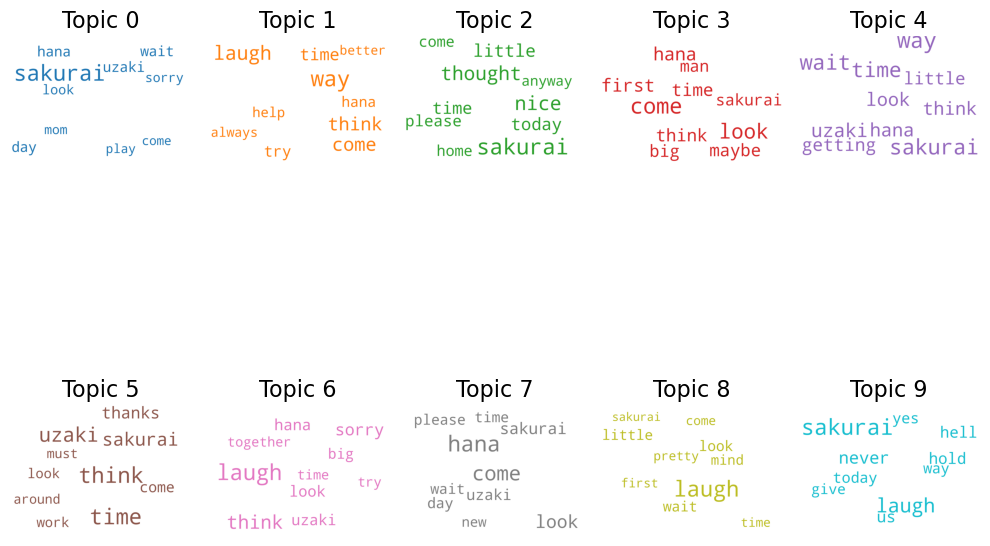

In [85]:
# Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()